# <font color= Blue> Exploratory Data Analysis on Indian Premiere League </font>

### <font color='darkblue'>Objective:: </font>
● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

● As a sports analyst, find out the most successful teams, players and factors contributing win or loss of a team.

● Suggest teams or players a company should endorse for its products.

● Dataset:https://bit.ly/34SRn3b

**1) Importing Libraries**

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

## EDA on Matches Dataset

In [2]:
matches_df = pd.read_csv("matches.csv")

In [3]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [5]:
matches_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
matches_df["season"].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

*Which Team Won by maximum Runs* 

In [7]:
matches_df.iloc[matches_df["win_by_runs"].idxmax()]["winner"]

'Mumbai Indians'

*Which Team Won by minimum Wickets* 

In [8]:
matches_df.iloc[matches_df["win_by_wickets"].idxmax()]["winner"]

'Kolkata Knight Riders'

## Season by Season analysis

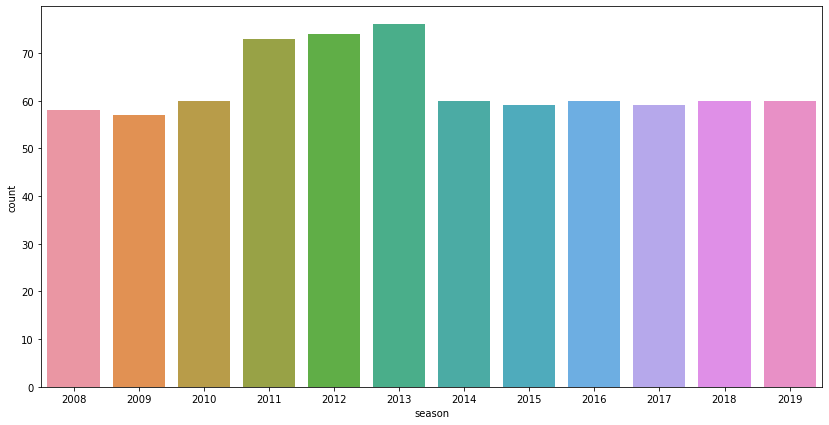

In [9]:
plt.figure(figsize=(14,7))
sns.countplot(data=matches_df,x='season')
plt.show()

Team Won Total number of matches 

<AxesSubplot:xlabel='winner'>

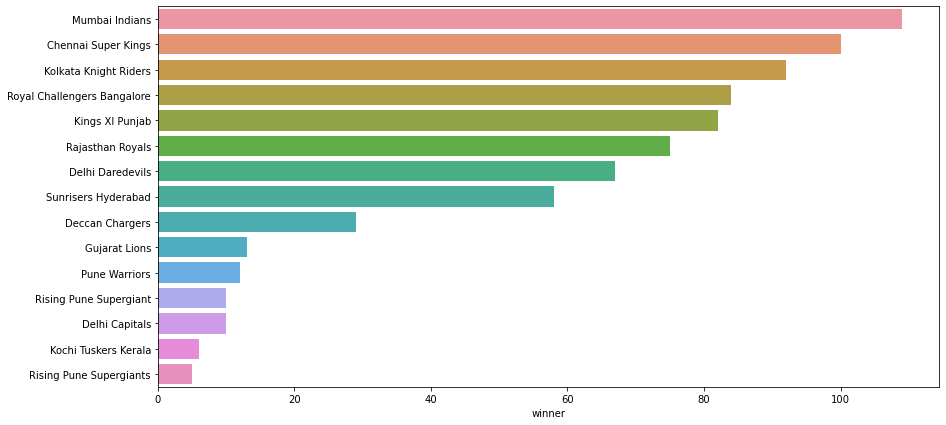

In [10]:
plt.figure(figsize=(14,7))
d=matches_df["winner"].value_counts()
sns.barplot(x=d,y=d.index)

<AxesSubplot:xlabel='player_of_match'>

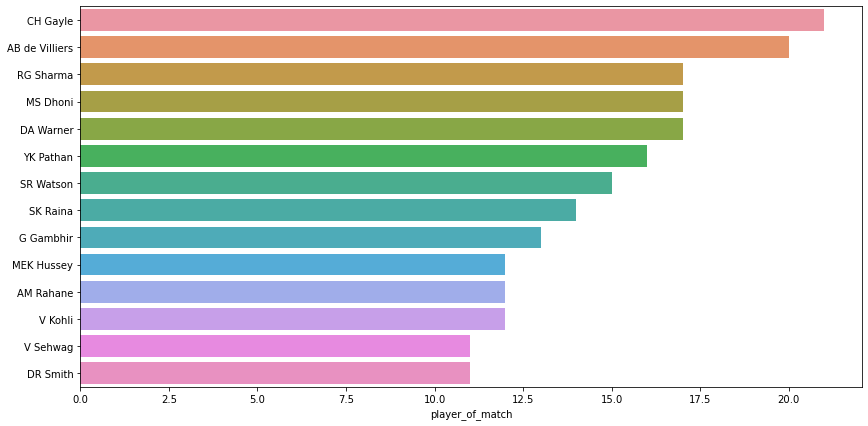

In [11]:
top_mom=matches_df["player_of_match"].value_counts()[:14]
plt.figure(figsize=(14,7))
sns.barplot(x=top_mom,y=top_mom.index)

<AxesSubplot:xlabel='venue'>

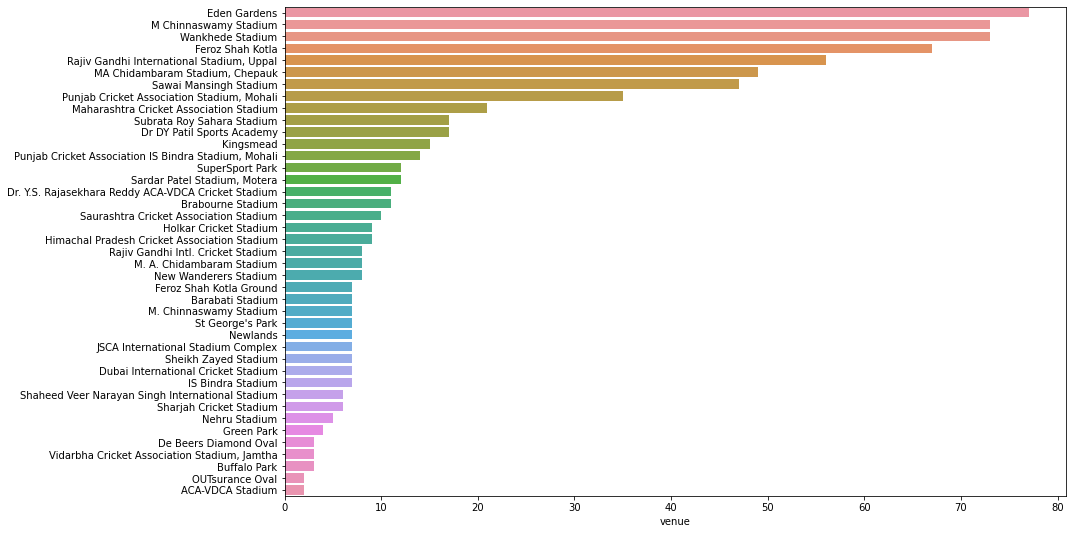

In [12]:
matches_venue=matches_df["venue"].value_counts()
plt.figure(figsize=(14,9))
sns.barplot(x=matches_venue,y=matches_venue.index)

In [13]:
series1= matches_df["team1"]
series2=matches_df["team2"]
number_of_matches=pd.concat([series1,series2],axis=0)
p=number_of_matches.value_counts()

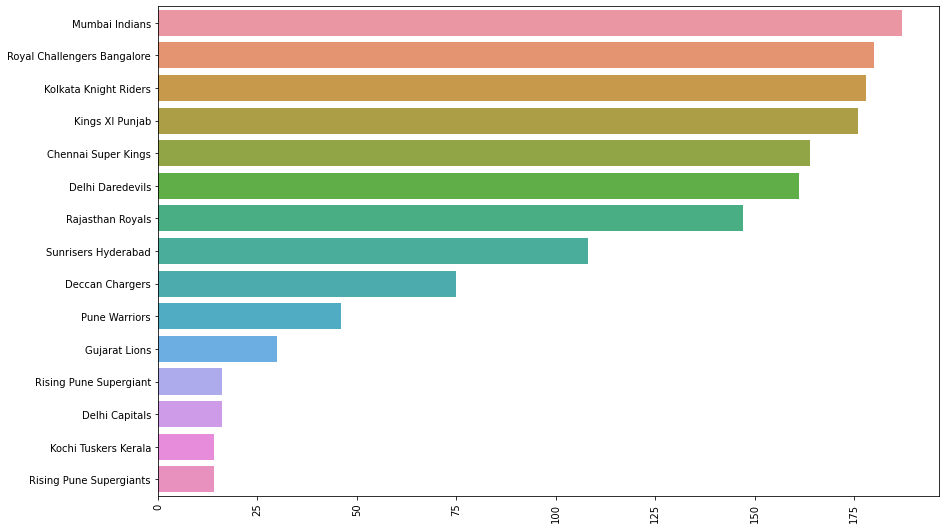

In [14]:
plt.figure(figsize=(14,9))
sns.barplot(x=p,y=p.index,orient="h")
plt.xticks(rotation='vertical')
plt.show()

In [15]:
Champions = matches_df.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']]
Champions

,season,winner
58,2017,Mumbai Indians
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad


Toss Decision 

## Deliveries Dataset 

In [16]:
deliveries=pd.read_csv("deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [45]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

**Batsman analysis:**

Let us start our analysis with batsman. Let us first see the ones with most number of IPL runs under their belt.

In [34]:
top_batter = deliveries.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
top_batter = top_batter.iloc[:15,:]
top_batter

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [35]:
temp_df = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:15,:]
temp_df

,batsman,batsman_runs
0,S Dhawan,526
1,SK Raina,495
2,G Gambhir,492
3,V Kohli,482
4,DA Warner,459
5,RV Uthappa,436
6,RG Sharma,431
7,AM Rahane,405
8,CH Gayle,376
9,PA Patel,366


In [37]:
temp_df = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:15,:]
temp_df

,batsman,batsman_runs
0,CH Gayle,327
1,AB de Villiers,214
2,MS Dhoni,207
3,SK Raina,195
4,RG Sharma,194
5,V Kohli,191
6,DA Warner,181
7,SR Watson,177
8,KA Pollard,175
9,YK Pathan,161


In [39]:
temp_df = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:15,:]
temp_df

,batsman,batsman_runs
0,V Kohli,1493
1,S Dhawan,1455
2,CH Gayle,1423
3,RG Sharma,1390
4,RV Uthappa,1382
5,SK Raina,1381
6,G Gambhir,1351
7,DA Warner,1254
8,AM Rahane,1198
9,MS Dhoni,1111


In [40]:
temp_df = deliveries.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:15,:]
temp_df

,bowler,ball
0,Harbhajan Singh,3451
1,A Mishra,3172
2,PP Chawla,3157
3,R Ashwin,3016
4,SL Malinga,2974
5,DJ Bravo,2711
6,B Kumar,2707
7,P Kumar,2637
8,UT Yadav,2605
9,SP Narine,2600


In [41]:
temp_df = deliveries.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:15,:]
temp_df

,bowler,total_runs
0,Harbhajan Singh,1244
1,SL Malinga,1144
2,B Kumar,1116
3,A Mishra,1108
4,PP Chawla,1100
5,P Kumar,1075
6,R Ashwin,1067
7,SP Narine,1038
8,DW Steyn,996
9,UT Yadav,942


In [42]:
temp_df = deliveries.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:15,:]
temp_df

,bowler,extra_runs
0,SL Malinga,221
1,P Kumar,185
2,UT Yadav,180
3,DJ Bravo,176
4,B Kumar,162
5,SR Watson,155
6,I Sharma,151
7,RP Singh,145
8,DW Steyn,139
9,R Ashwin,133


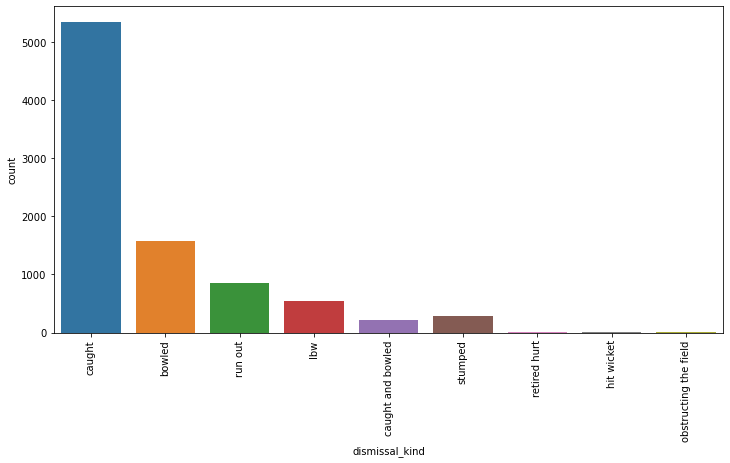

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind', data=deliveries)
plt.xticks(rotation='vertical')
plt.show()